In [3]:
# Libraries
%matplotlib inline

import os
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

print("Libraries loaded!")

Libraries loaded!


In [4]:
# Laboratory argument(s)
sFileTS_Discharge = 'hmc.hydrograph.txt'

sPathLab = os.path.join('/','home','fabio','Desktop', 'PyCharm_Workspace_Python3', 'fp-labs')
sPathTS_File = os.path.join(sPathLab, 'data', 'ts', 'hmc')
sFolderTS_Img = os.path.join(sPathLab, 'img')

In [10]:
# Read discharge time-series
oFileTS_Discharge = pd.read_table(os.path.join(sPathTS_File, sFileTS_Discharge), 
                                  header=None, lineterminator='\n', names=['data'])

a1oTS_TIME = []
a2oTS_DATA = []

for iI, oTS in enumerate(oFileTS_Discharge['data']):
    oTS = oTS.split('\t')
    
    a1oTS_RAW = oTS[0].split()
    
    oTS_TIME = a1oTS_RAW[0]
    a1oTS_DATA = a1oTS_RAW[1:]
    a1dTS_DATA = [float(iI) for iI in a1oTS_DATA]
    
    a1oTS_TIME.append(oTS_TIME)
    a2oTS_DATA.append(a1dTS_DATA)

iTS_N = a2oTS_DATA[0].__len__()

oTS_Discharge = pd.DataFrame([])
oTS_Columns = ["section_{:}".format(iIdx) for iIdx in range(1, iTS_N + 1 )]

oTS_Discharge = pd.DataFrame(a2oTS_DATA)
oTS_Discharge.columns = oTS_Columns

oTS_Discharge = oTS_Discharge.set_index(pd.DatetimeIndex(pd.to_datetime(a1oTS_TIME)))

['201610230000', '201610230100', '201610230200', '201610230300', '201610230400', '201610230500', '201610230600', '201610230700', '201610230800', '201610230900', '201610231000', '201610231100', '201610231200', '201610231300', '201610231400', '201610231500', '201610231600', '201610231700', '201610231800', '201610231900', '201610232000', '201610232100', '201610232200', '201610232300', '201610240000', '201610240100', '201610240200', '201610240300', '201610240400', '201610240500', '201610240600', '201610240700', '201610240800', '201610240900', '201610241000', '201610241100', '201610241200', '201610241300', '201610241400', '201610241500', '201610241600', '201610241700', '201610241800', '201610241900', '201610242000', '201610242100', '201610242200', '201610242300', '201610250000', '201610250100', '201610250200', '201610250300', '201610250400', '201610250500', '201610250600', '201610250700', '201610250800']
<class 'list'>


In [6]:
# Resample time-series 2 to daily values
oTS_Discharge_Res = pd.DataFrame()
oTS_Discharge_Res['section_2_sum'] = oTS_Discharge.section_2.resample('D').sum().dropna()
oTS_Discharge_Res['section_2_avg'] = oTS_Discharge.section_2.resample('D').mean().dropna()

print(oTS_Discharge_Res.head())

            section_2_sum  section_2_avg
2016-10-23          79.74       3.322500
2016-10-24         192.57       8.023750
2016-10-25          22.97       2.552222


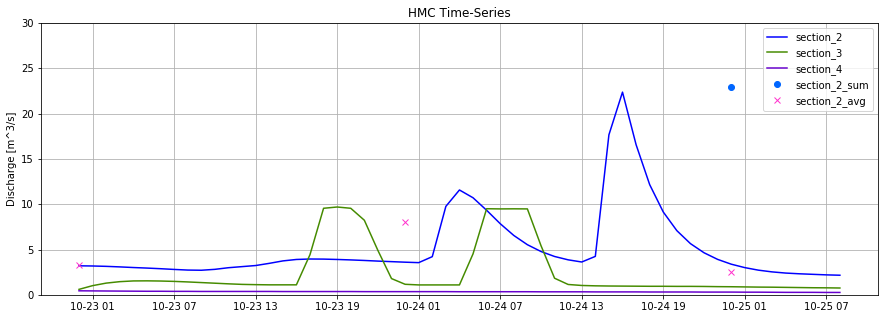

In [22]:
# Plot HMC discharge time-series
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(oTS_Discharge['section_2'], color='#0000FF')
ax.plot(oTS_Discharge['section_3'], color='#458B00')
ax.plot(oTS_Discharge['section_4'], color='#6600cc')

ax.plot(oTS_Discharge_Res['section_2_sum'], color='#0066ff', marker='o', lw=0)
ax.plot(oTS_Discharge_Res['section_2_avg'], color='#ff33cc', marker='x', lw=0)

ax.set_ylim(0, 30)
ax.set_title('HMC Time-Series')
ax.set_ylabel('Discharge [m^3/s]')
ax.grid(b=True)

plt.legend()

filename = os.path.join(sFolderTS_Img, "hmc_ts_discharge.tiff")
fig.savefig(filename, dpi=50)